# rfiremoval usage in multi_fpga_vis.py (example using 01/26)

$ multi_fpga_vis_rfi.py -v --16bit -n 10000 --nB 1 --hd 2 --meta 64 --blocklen 128000 -g fpga0.20240126122800.bin  'all' --rfif fpga0.20240126050000.bin -o result_0126_test

# rfiremoval usage for single data file

In [1]:
from rfiremoval import *

In [2]:
nAnt = 16
nChan = 1024
nPack = 10000
blocklen = 128000
meta = 64
nBlock = 1
pack0 = 0
order_off = 0
verbose = False
bitwidth = 16
hdver = 2

In [3]:
chan = np.arange(nChan)

In [4]:
## RFI-only data
rfifname = 'fpga0.20240126050000.bin'

In [5]:
# Main Data
dfile = 'fpga0.20240126122800.bin'

In [6]:
cdir = ""

### Load RFI data

In [7]:
rfi_norm1c, V1c0 = loadRFI(rfifname, nBlock, blocklen, meta, pack0, nPack, order_off, verbose, bitwidth, hdver)

### Load main data (remember to check bitmap and edit accordingly)

In [8]:
#bitmap = np.ones(nPack, dtype=bool)

In [9]:
with open(dfile, 'rb') as fh:
        BM = loadFullbitmap(fh, nBlock, blocklen=blocklen, meta=meta)
        bitmap = BM[pack0:pack0+nPack] #
        tick, tmpspec = loadSpec(fh, pack0, nPack, order_off=order_off, bitmap=bitmap, 
                                       verbose=verbose, bitwidth=bitwidth, hdver=hdver, meta=meta, nBlock=nBlock)

### Remove RFI from main data

In [10]:
rspec2 = remoRFI(tmpspec, rfi_norm1c, V1c0,nChan, nAnt)

### Plot to compare results

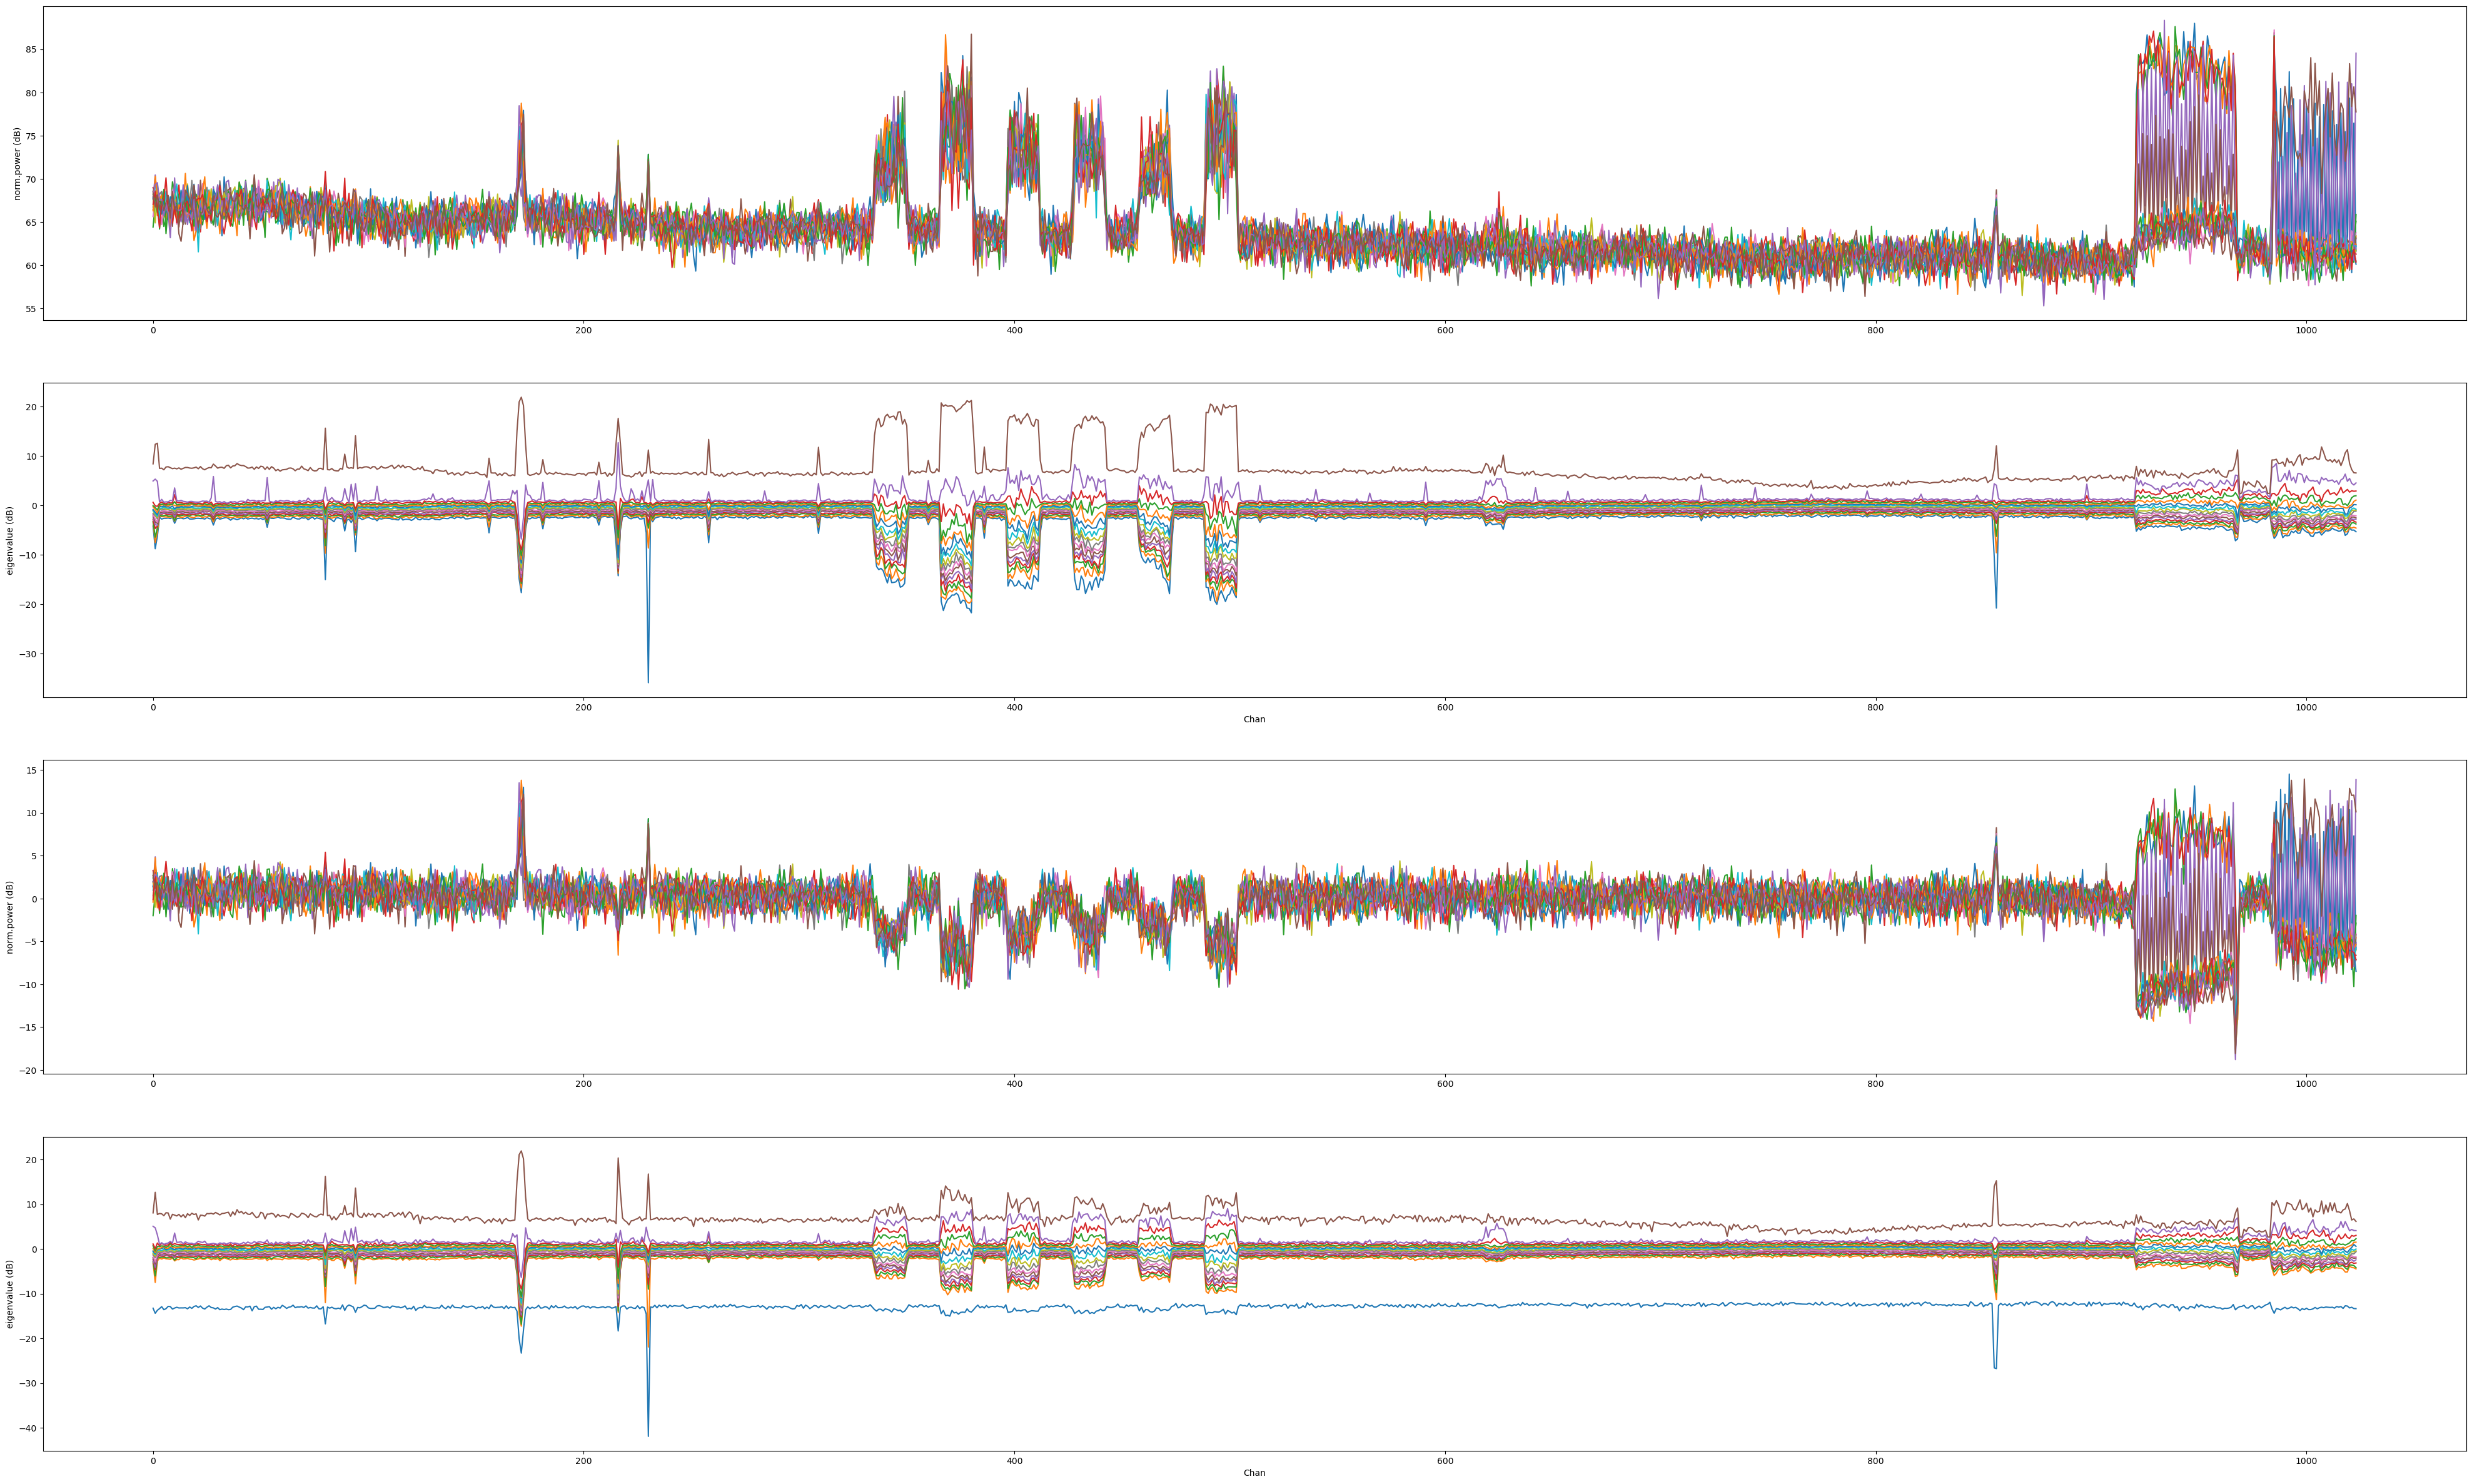

In [11]:
plotRFI(tmpspec, rspec2, nChan,nAnt, cdir, dfile)

### Above functions compiled together:

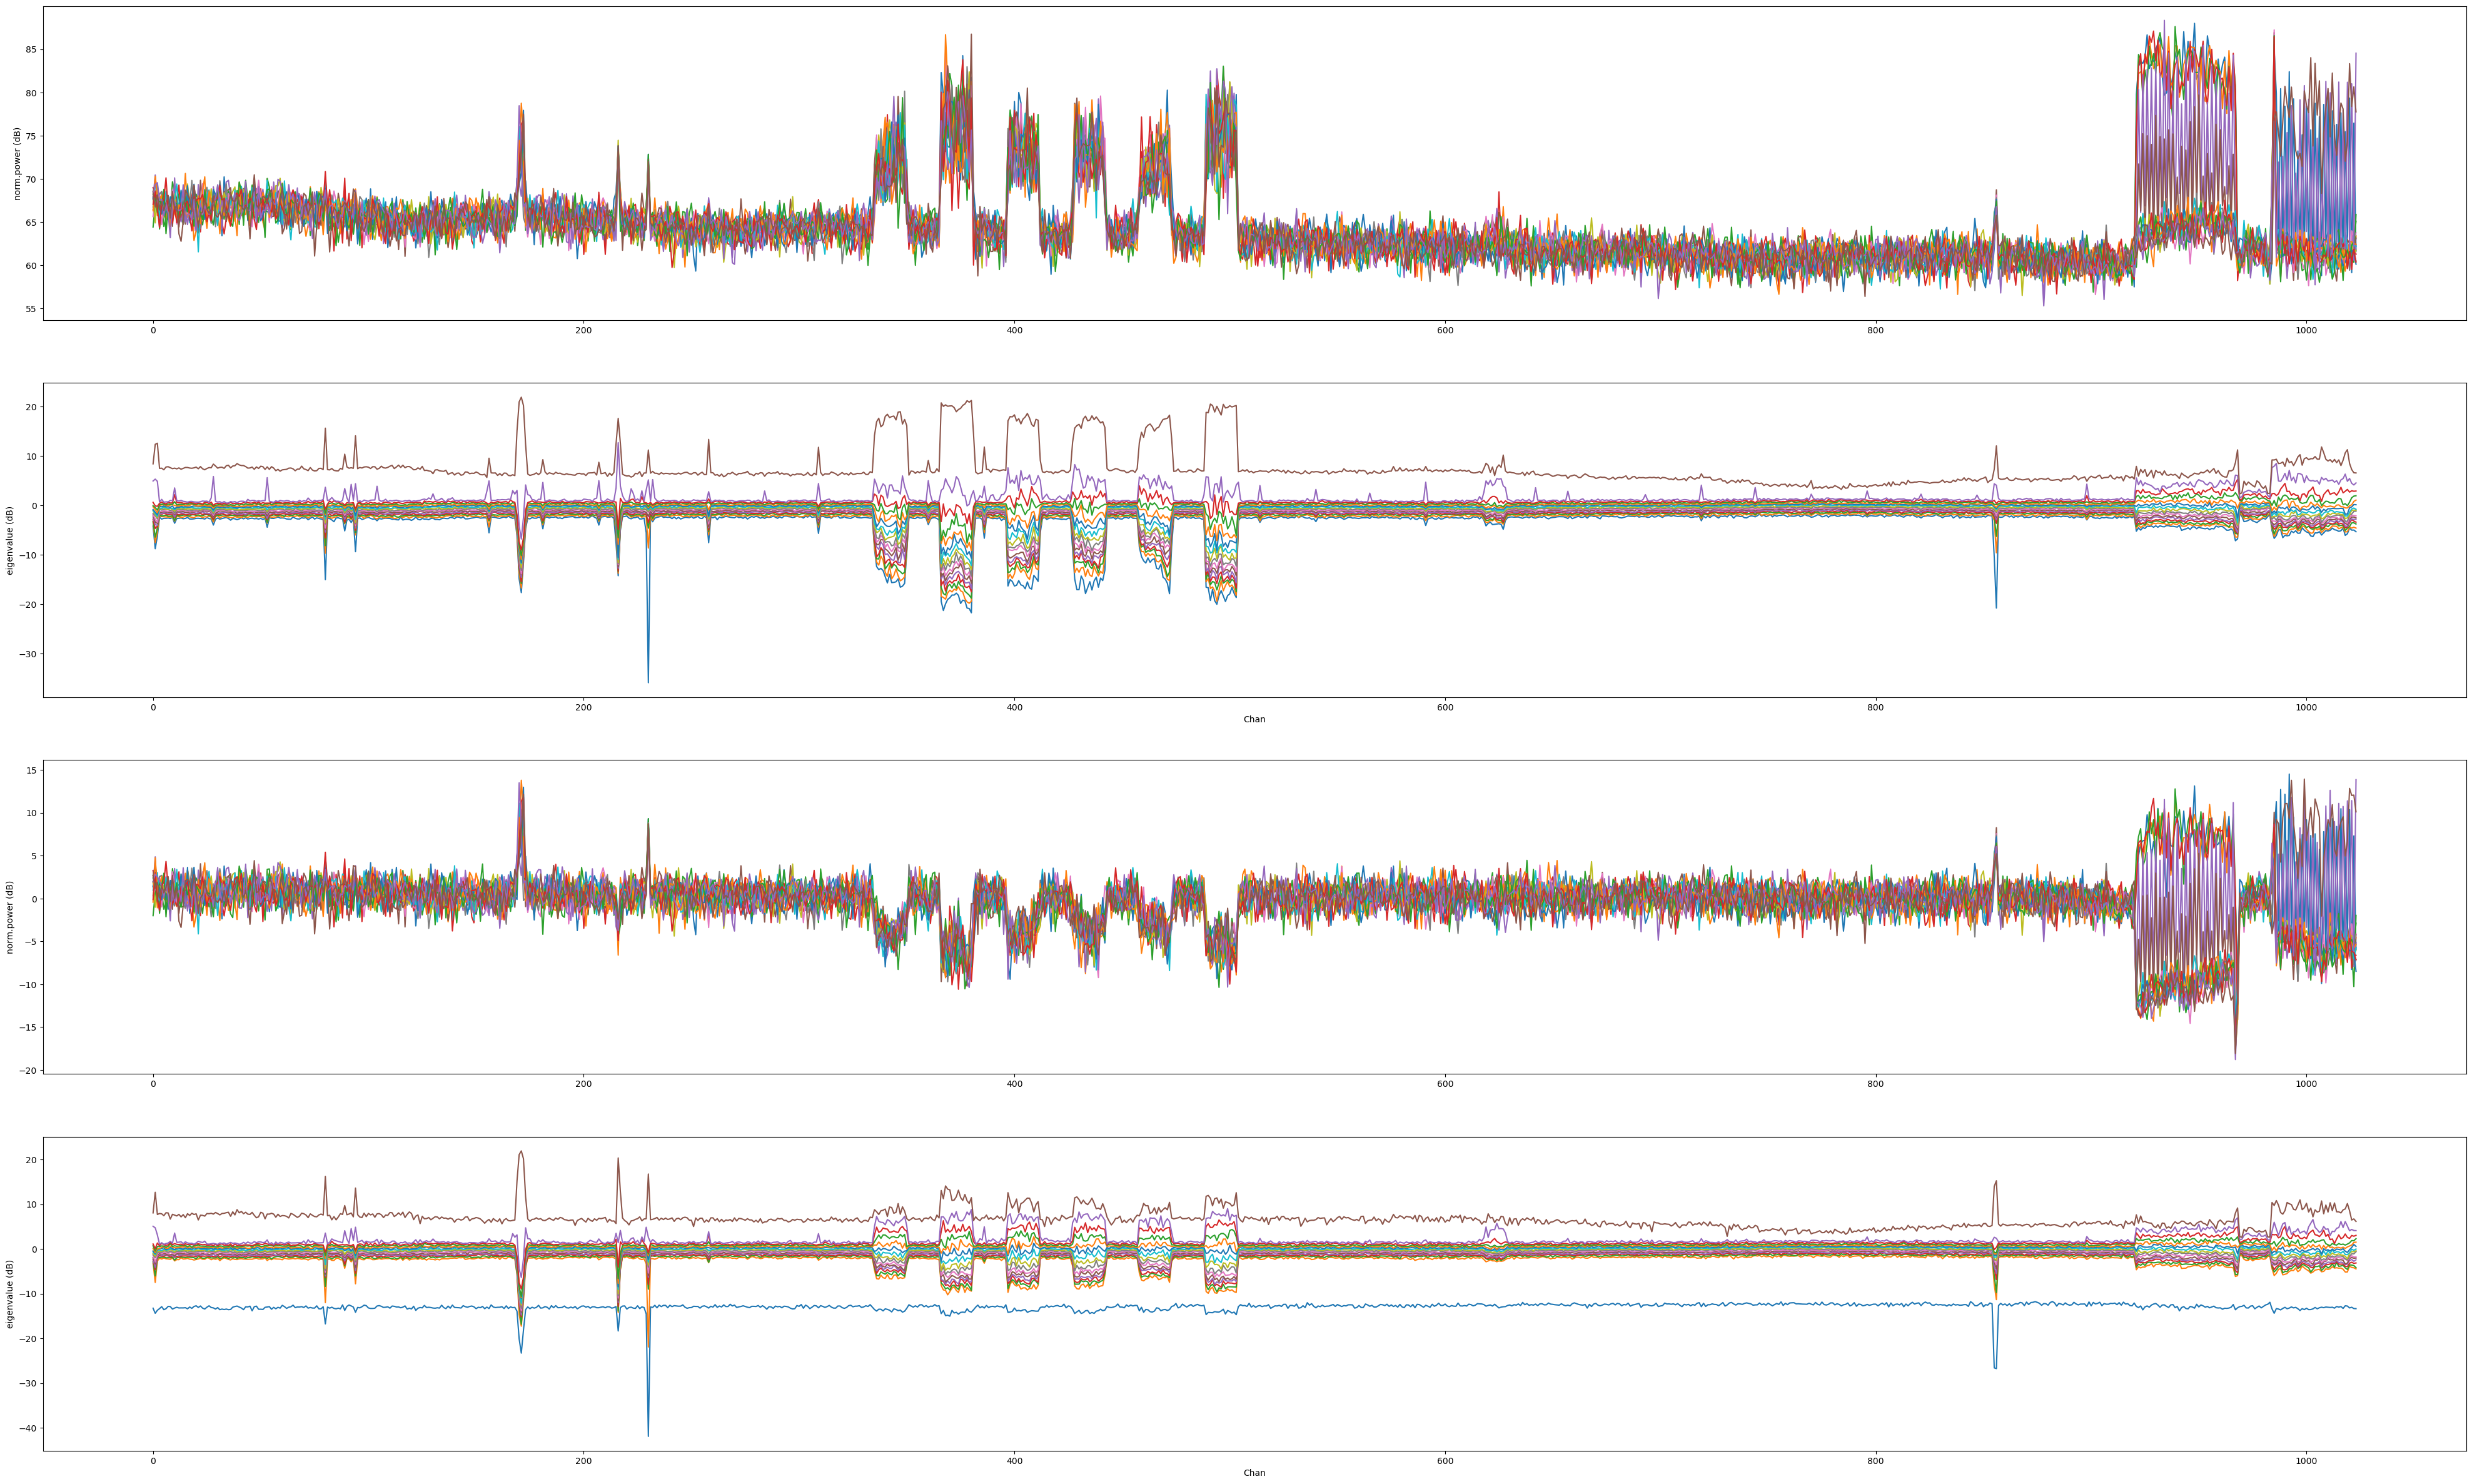

In [12]:
main(nAnt, nChan, rfifname, dfile, nBlock, blocklen, meta, pack0, nPack, order_off, verbose, bitwidth, hdver, cdir)